## Imports

In [1]:
import numpy as np
from scipy import stats
import statsmodels.stats.diagnostic as diag
import matplotlib.pyplot as plt

## Input data

In [2]:
def input_data(file):
    good_runs = []
    failed_runs = 0
    with open(file, "r") as f:
        f.readline()
        for line in f:
            res = list(map(float, line.split(",")))
            if res[1] < 0:
                failed_runs += 1
            else:
                good_runs.append(res[0])
    return np.array(good_runs), failed_runs


### Input Control group:

In [3]:
cgr, cfr = input_data("data/base_10.txt")

### Input Other samples:

In [4]:
gr, fr = input_data("data/random_10.txt")

## Compute mean and standard deviation

Control group mean: 37.591122222222225
Control group standard deviation: 2.3567821745751263


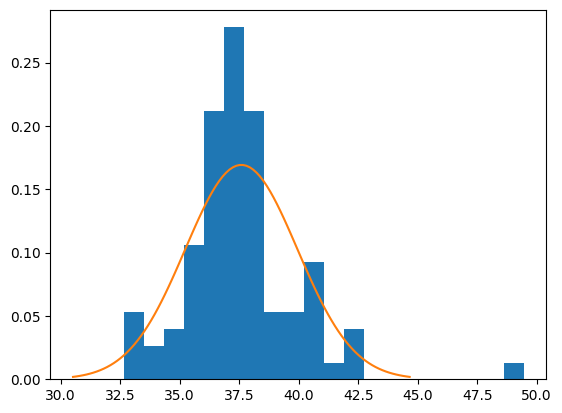

In [5]:

cmean = np.mean(cgr)
cstd = np.std(cgr)

print("Control group mean:", cmean)
print("Control group standard deviation:", cstd)

x = np.linspace(cmean - 3 * cstd, cmean + 3 * cstd, 100)

%matplotlib inline

cdensity = plt.hist(cgr, bins=20, density=True)
plt.plot(x, stats.norm.pdf(x, cmean, cstd))
plt.show()

## Lilliefors Test

In [12]:
print("Lilliefors")
ksstat, pvalue = diag.lilliefors(cgr, dist="norm", pvalmethod="table")
print("ksstat:", ksstat)
print("pvalue:", pvalue)

print("Shapiro-Wilk")
ksstat, pvalue = stats.shapiro(cgr)
print("ksstat:", ksstat)
print("pvalue:", pvalue)

print("Anderson-Darling")
ksstat, pvalue = diag.normal_ad(cgr)
print("ksstat:", ksstat)
print("pvalue:", pvalue)


print("Anderson-Darling")
andObj = stats.anderson(cgr, "norm")
print("Stat:", andObj.statistic)
print("Crit:", andObj.critical_values)
print("Levels:", andObj.significance_level)

print("Anderson-Darling Logistic")
andObj = stats.anderson(cgr, "logistic")
print("Stat:", andObj.statistic)
print("Crit:", andObj.critical_values)
print("Levels:", andObj.significance_level)

print("Anderson-Darling Gumbel")
andObj = stats.anderson(cgr, "gumbel")
print("Stat:", andObj.statistic)
print("Crit:", andObj.critical_values)
print("Levels:", andObj.significance_level)



Lilliefors
ksstat: 0.14572031730216095
pvalue: 0.0009999999999998899
Shapiro-Wilk
ksstat: 0.8960422277450562
pvalue: 2.704445023482549e-06
Anderson-Darling
ksstat: 2.0880978606138
pvalue: 2.3762502104882127e-05
Anderson-Darling
Stat: 2.0880978606118106
Crit: [0.553 0.63  0.756 0.882 1.049]
Levels: [15.  10.   5.   2.5  1. ]
Anderson-Darling Logistic
Stat: 0.9459916475413621
Crit: [0.425 0.561 0.658 0.767 0.903 1.007]
Levels: [25.  10.   5.   2.5  1.   0.5]
Anderson-Darling Gumbel
Stat: 8.289909463458116
Crit: [0.464 0.624 0.741 0.859 1.017]
Levels: [25.  10.   5.   2.5  1. ]
